In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Прочитайте данные (переменную назовите 'df')
df = pd.read_csv('data.csv')

# Вывести несколько первых строк таблицы данных
print(df.head())

         Дата  Склад Контрагент Номенклатура  Количество
0  2018-01-04      1  address_0    product_0           4
1  2018-01-04      1  address_0    product_1           4
2  2018-01-04      1  address_0    product_2           5
3  2018-01-04      1  address_0    product_3          10
4  2018-01-04      1  address_0    product_4           2


Проверяем формат столбцов

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301355 entries, 0 to 301354
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   Дата          301355 non-null  object
 1   Склад         301355 non-null  int64 
 2   Контрагент    301355 non-null  object
 3   Номенклатура  301355 non-null  object
 4   Количество    301355 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 11.5+ MB


Сразу переведем столбец "Дата" в правильный формат

In [41]:
df['Дата'] = pd.to_datetime(df['Дата'], errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301355 entries, 0 to 301354
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Дата          301355 non-null  datetime64[ns]
 1   Склад         301355 non-null  int64         
 2   Контрагент    301355 non-null  object        
 3   Номенклатура  301355 non-null  object        
 4   Количество    301355 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 11.5+ MB


Сгруппируйте данные по дате, посчитайте количество продаж

In [67]:
grouped_df = df.groupby('Дата').agg(
    Количество_продаж=('Количество', 'sum'),
).reset_index()

Вывести несколько первых строк сгруппированных данных

In [77]:
grouped_df.head(20)

,Дата,Количество_продаж
0,2018-01-04,3734
1,2018-01-05,3643
2,2018-01-06,3193
3,2018-01-07,3298
4,2018-01-09,4055
5,2018-01-10,3653
6,2018-01-11,3176
7,2018-01-12,3092
8,2018-01-13,3294
9,2018-01-14,3228


Нарисуйте график продаж у `grouped_df`

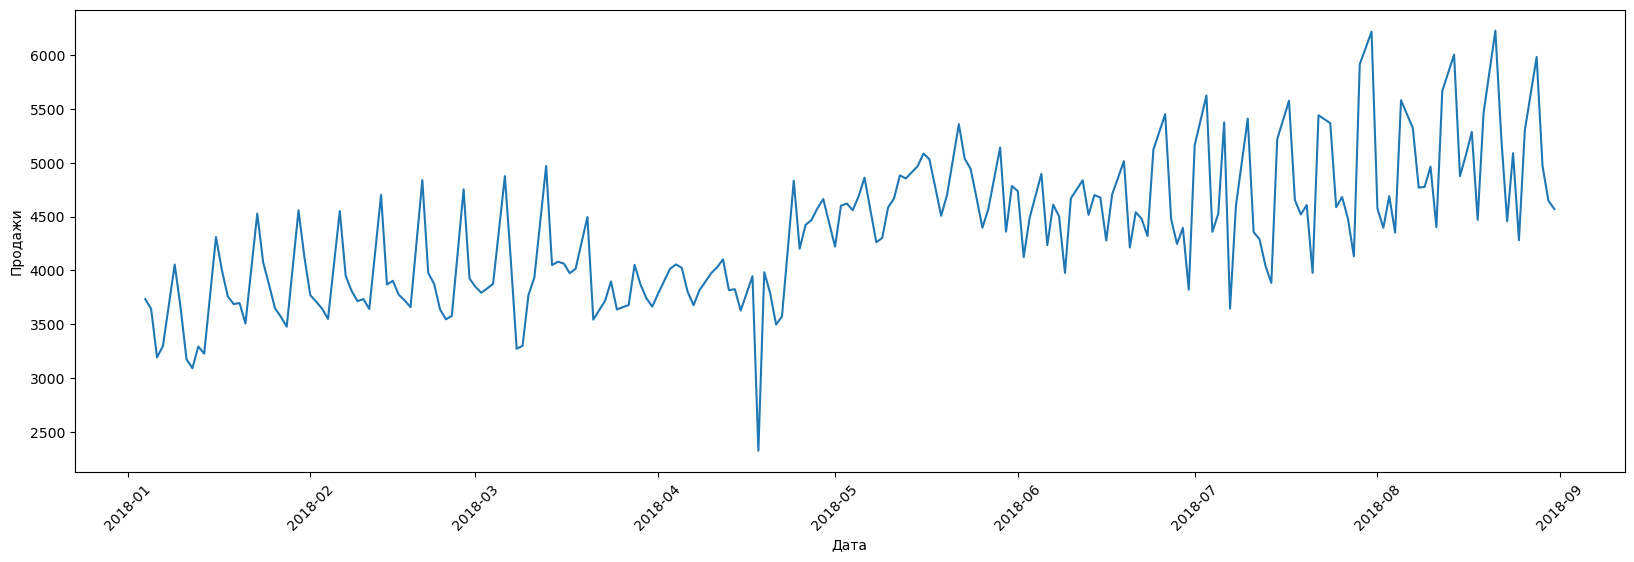

In [79]:
plt.figure(figsize=(20, 6))
plt.plot(grouped_df['Дата'], grouped_df['Количество_продаж'])
plt.xlabel('Дата')
plt.ylabel('Продажи')
plt.xticks(rotation=45)
plt.show()

Опишите что вы видите на графике. Ваша задача - максимально описать график

Линия содержит резкие пики и падения, что указывает на нерегулярность продаж. Между отдельными датами часто наблюдаются колебания, т.е. продажи не равномерны. В общей картине продажи растут.

Найдите строку, у которой максимальный выброс по количеству продаж (нужно найти выброс у `df`)

In [81]:
Q1 = df['Количество'].quantile(0.25)
Q3 = df['Количество'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[df['Количество'] > upper_bound]
max_outlier = outliers.sort_values(by='Количество', ascending=False).head(1)
print(max_outlier)

             Дата  Склад   Контрагент Номенклатура  Количество
218822 2018-06-28      1  address_208    product_0         200


Найдите топовый товар по продажам по средам за июнь, июль, август у 3 склада

In [86]:
df['Месяц'] = df['Дата'].dt.month
df['День_недели'] = df['Дата'].dt.dayofweek  # Понедельник = 0, Среда = 2

filtered = df[
    (df['Месяц'].isin([6, 7, 8])) &
    (df['День_недели'] == 2) &
    (df['Склад'] == 3)
]

top_product = (
    filtered.groupby('Номенклатура')['Количество']
    .sum()
    .reset_index()
    .sort_values(by='Количество', ascending=False)
    .head(1)
)

print(top_product)

  Номенклатура  Количество
1    product_1        2267


Скачайте данные по погоде с https://rp5.ru/Архив_погоды_в_Астане (скачайте исходные данные, и далее преобразуйте так, чтобы мы имели Дату и Среднюю температуру за день), объедините таблицу температуры с `grouped_df`, и нарисуйте график `y=['Количество продаж', 'T']`, где Т это температура. А также отдельно график температуры.

In [90]:
weather_df = pd.read_csv(
    '35188.01.01.2018.31.08.2018.1.0.0.ru.utf8.00000000.csv.gz',
    encoding='utf-8',
    skiprows=6,  # Пропуск шапки RP5
    delimiter=';',
    usecols=[0, 1],  # Только дата и температура
    names=['Дата', 'Температура'],
    header=None
)

In [94]:
weather_df = weather_df.drop(index=0).reset_index(drop=True)

In [96]:
weather_df

,Дата,Температура
0,31.08.2018 23:00,8.2
1,31.08.2018 20:00,9.6
2,31.08.2018 17:00,11.3
3,31.08.2018 14:00,12.3
4,31.08.2018 11:00,13.2
...,...,...
1937,01.01.2018 14:00,-6.7
1938,01.01.2018 11:00,-8.5
1939,01.01.2018 08:00,-11.1
1940,01.01.2018 05:00,-10.8


In [98]:
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1942 entries, 0 to 1941
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Дата         1942 non-null   object
 1   Температура  1942 non-null   object
dtypes: object(2)
memory usage: 30.5+ KB


In [102]:
weather_df['Дата'] = pd.to_datetime(weather_df['Дата'], dayfirst=True, errors='coerce')
weather_df['Температура'] = weather_df['Температура'].astype(float)

In [104]:
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1942 entries, 0 to 1941
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Дата         1942 non-null   datetime64[ns]
 1   Температура  1942 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 30.5 KB


In [110]:
daily_temp = (
    weather_df
    .groupby(weather_df['Дата'].dt.date)['Температура']
    .mean()
    .reset_index()
    .rename(columns={'Дата': 'Дата', 'Температура': 'T'})
)

In [114]:
daily_temp['Дата'] = pd.to_datetime(daily_temp['Дата'])
daily_temp

,Дата,T
0,2018-01-01,-9.4625
1,2018-01-02,-9.5125
2,2018-01-03,-11.4625
3,2018-01-04,-14.0750
4,2018-01-05,-16.8625
...,...,...
238,2018-08-27,12.5250
239,2018-08-28,14.1125
240,2018-08-29,13.8250
241,2018-08-30,14.1750


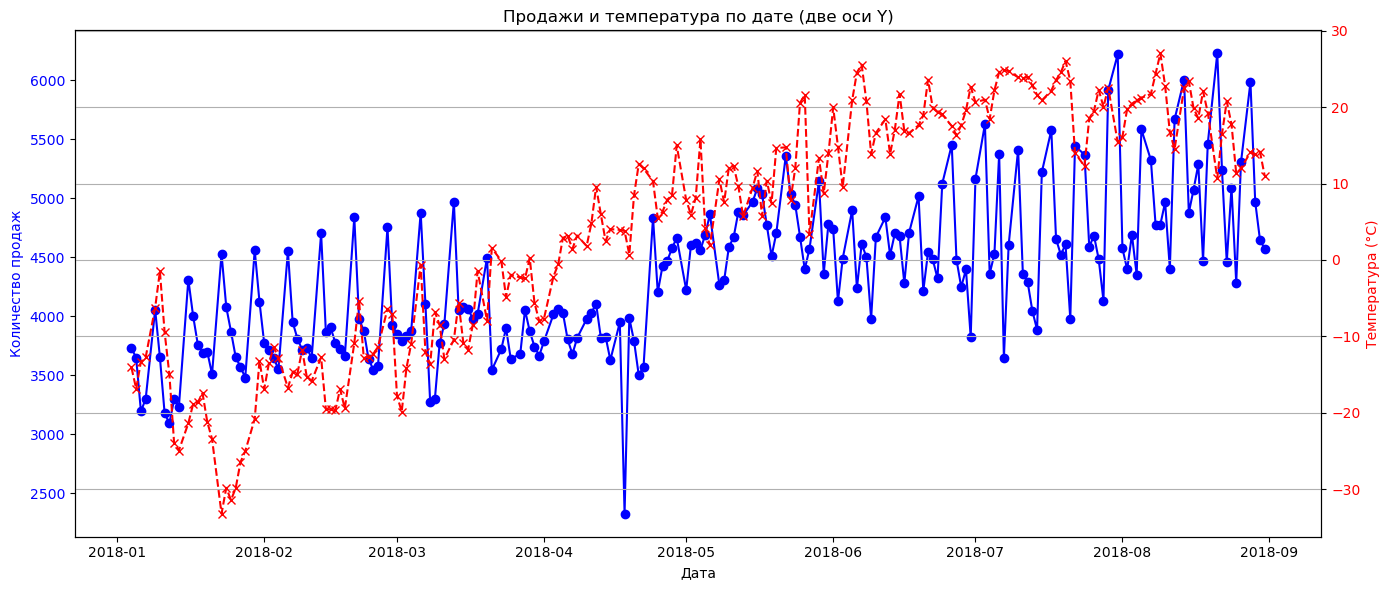

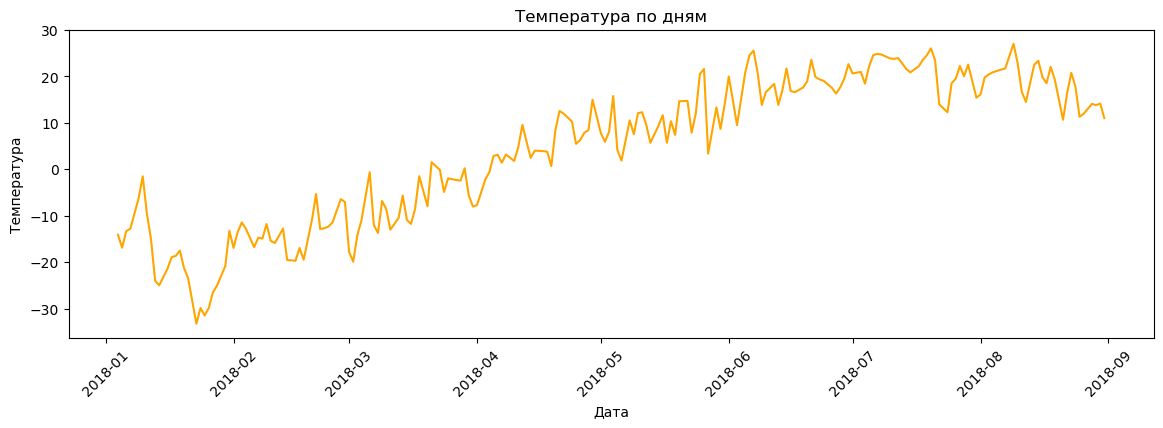

In [128]:
merged_df = pd.merge(grouped_df, daily_temp, on='Дата', how='inner')

fig, ax1 = plt.subplots(figsize=(14, 6))
ax1.plot(merged_df['Дата'], merged_df['Количество_продаж'], color='blue', label='Количество продаж', marker='o')
ax1.set_xlabel('Дата')
ax1.set_ylabel('Количество продаж', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

ax2 = ax1.twinx()
ax2.plot(merged_df['Дата'], merged_df['T'], color='red', label='Температура (°C)', linestyle='--', marker='x')
ax2.set_ylabel('Температура (°C)', color='red')
ax2.tick_params(axis='y', labelcolor='red')

plt.title('Продажи и температура по дате (две оси Y)')
fig.tight_layout()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

plt.figure(figsize=(14, 4))
plt.plot(merged_df['Дата'], merged_df['T'], label='Температура', color='orange')
plt.title('Температура по дням')
plt.xlabel('Дата')
plt.ylabel('Температура')
plt.xticks(rotation=45)
plt.show()